以SEIR模型和新增数据分析自12月份的疫情

SEIR模型是一个理想化的疫情传播模型

其中
S:（Susceptible）未感染人群；E：(Exposed)已暴露人群；I：(Infectious)已感染人群；R：(Recovered)已痊愈人群

N = S+E+I+R 代表总人口，我们假设N为常量|，$\partial_t N = 0 = \partial_t S +\partial_t E +\partial_t I +\partial_t R$

S 在接触 I 后会转变成 E， E 有一定概率变成 I， I 最终会痊愈获得抗体从而不会被感染。

因此人口是从S->E->I->R单向流动的

以下是流动模型

$\partial_t S = -\frac{1}{N} \beta S I$

$\partial_t E = \frac{1}{N} \beta S I - \alpha E$

$\partial_t I = \alpha E -\gamma I$

$\partial_t R = \gamma I$


$\beta$ 表示未感染人群变为已暴露人群的传输率（Transmissionsrate）

$\gamma$ 表示已感染人群变为痊愈人群的回复率（Erholungsrate）

$\alpha$ 表示已暴露人群变为已感染人群的转化率（Übergangsrate）

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint

In [2]:
from numpy import array as vector
import matplotlib.pylab as plt
# Explizites Euler-Verfahren
def euler_method(f, t0, x0, t1, h):
    t = t0; x = x0
    a = [[t, x]]
    for k in range(0, 1 + int((t1 - t0)/h)):
        t = t0 + k*h
        x = x + h*f(t, x)
        a.append([t, x])
    return a

def SEIR_model(alpha, beta, gamma):
    def f(t, x):
        s, e, i, r = x
        return vector([
            -beta*s*i,
            beta*s*i - alpha*e,
            alpha*e - gamma*i,
            gamma*i
        ])
    return f

def SEIR_simulation(alpha, beta, gamma, e0, i0, days, step=0.1):
    x0 = vector([1.0 - e0 - i0, e0, i0, 0.0])
    f = SEIR_model(alpha, beta, gamma)
    return euler_method(f, 0, x0, days, step)


def diagram(simulation):
    import matplotlib.pyplot as plot
    figure,axes = plot.subplots()
    figure.subplots_adjust(bottom = 0.15)
    axes.grid(linestyle = ':', linewidth = 2.0, color = "#808080")
    t,x = zip(*simulation())
    s, e, i, r = zip(*x)
    axes.plot(t, s, color = "#0000cc",label = 's Susceptible')
    axes.plot(t, e, color = "#ffb000", linestyle = '--',label = 'e Exposed')
    axes.plot(t, i, color = "#a00060",label = 'i Infections')
    axes.plot(t, r, color = "#008000", linestyle = '--',label = 'r Recovered')
    plt.legend()
    plt.show()



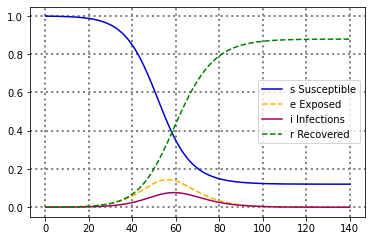

In [3]:
def simulation1():   #normal version
    N = 83200000 # Einwohnerzahl von Deutschland 2019/2020
    R0 = 2.4; gamma = 1/3.0
    return SEIR_simulation(
        alpha = 1/5.5, beta = R0*gamma, gamma = gamma,
        e0 = 40000.0/N, i0 = 10000.0/N, days = 140)

diagram(simulation1)

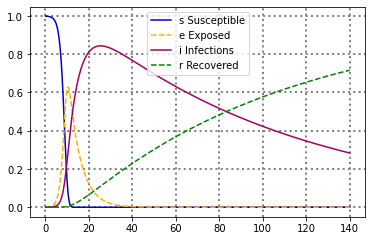

In [4]:
def simulation2():   #large infectious case
    N = 83200000 # Einwohnerzahl von Deutschland 2019/2020
    R0 = 500; gamma = 0.01
    return SEIR_simulation(
        alpha = 1/5.5, beta = R0*gamma, gamma = gamma,
        e0 = 40000.0/N, i0 = 10000.0/N, days = 140)

diagram(simulation2)

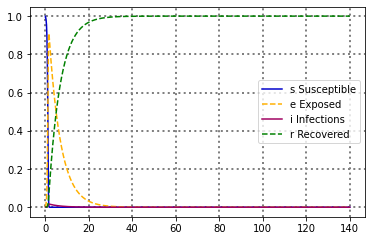

In [5]:
def simulation3():  #large recover rate 
    N = 83200000 # Einwohnerzahl von Deutschland 2019/2020
    R0 = 50; gamma = 10
    return SEIR_simulation(
        alpha = 1/5.5, beta = R0*gamma, gamma = gamma,
        e0 = 40000.0/N, i0 = 10000.0/N, days = 140)

diagram(simulation3)

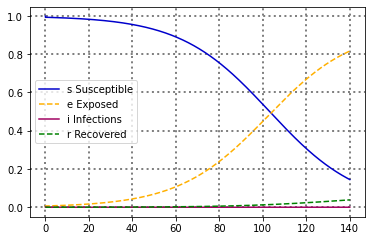

In [6]:
def simulation3():  #large recover rate 
    N = 83200000 # Einwohnerzahl von Deutschland 2019/2020
    R0 = 50; gamma = 10
    return SEIR_simulation(
        alpha = 0.001, beta = R0*gamma, gamma = gamma,
        e0 = 40000.0/N, i0 = 10000.0/N, days = 140)

diagram(simulation3)

<AxesSubplot:xlabel='Date_reported'>

<Figure size 576x1440 with 0 Axes>

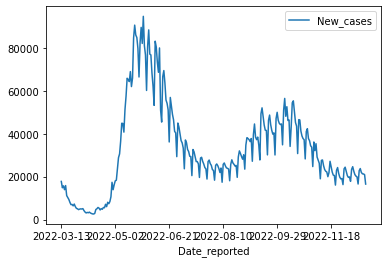

In [18]:
plt.figure(figsize=(8, 20))
file_name = './WHO-COVID-19-global-data.csv'
data = pd.read_csv(file_name)
data_1 = data.loc[data['Country'] == 'China']
data_1[800:1200].plot(x = 0, y = 'New_cases')